In [1]:
# Trader Behavior Insights Based on Market Sentiment
# Exploring Hyperliquid Trading Data + Fear & Greed Index

# Goal:  To uncover how trader profitability and behavior change across different Bitcoin market sentiments (Fear, Greed, etc.), and derive insights that can fuel smarter trading strategies.


Importing Libraries and Loading datasets

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Loading datasets
trades = pd.read_csv('../data/historical_data.csv')
sentiment = pd.read_csv('../data/fear_greed_index.csv')

Preprocessing

In [3]:
# Converting dates
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Merging sentiment info into trades
merged = trades.merge(sentiment[['date', 'classification', 'value']], on='date', how='left')

# Dropping rows with missing sentiment (optional)
merged.dropna(subset=['classification'], inplace=True)

In [4]:
merged.describe()
merged['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Visual Analysis

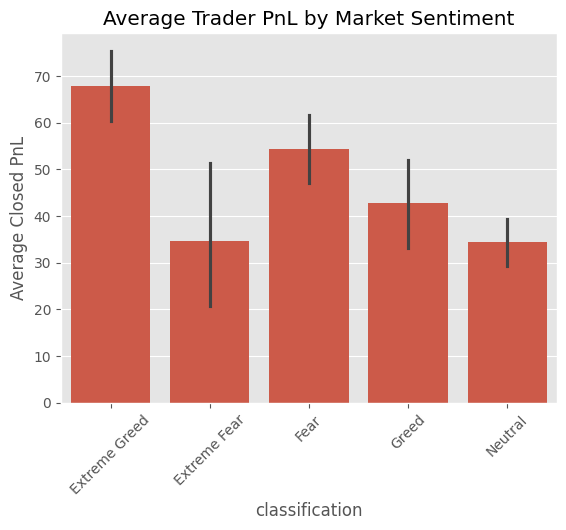

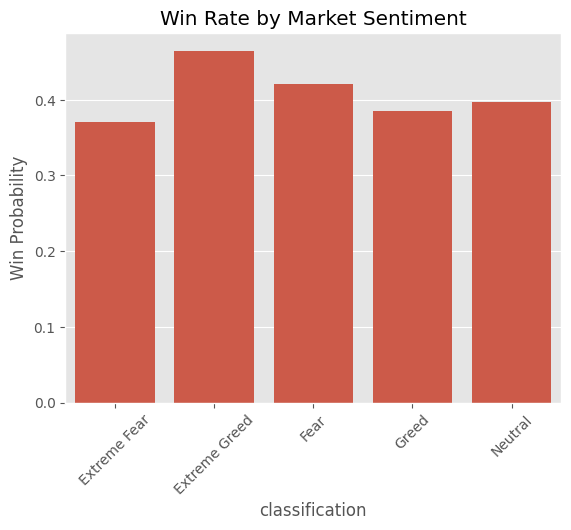

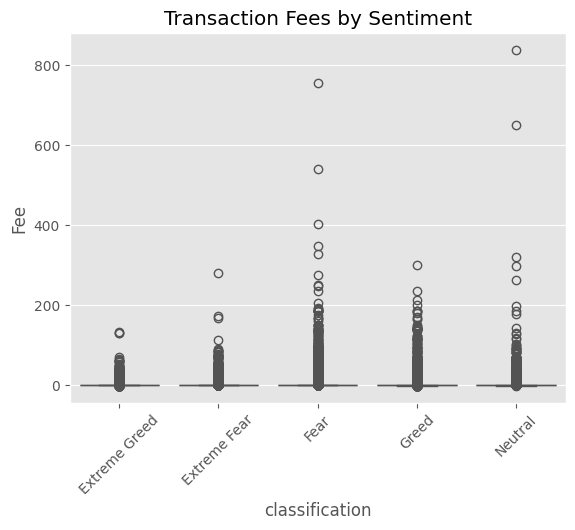

In [5]:
#Average PnL per Sentiment
sns.barplot(data=merged, x='classification', y='Closed PnL', estimator=np.mean)
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.show()

# Win Rate per Sentiment
merged['win'] = merged['Closed PnL'] > 0
win_rate = merged.groupby('classification')['win'].mean().reset_index()
sns.barplot(data=win_rate, x='classification', y='win')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Probability")
plt.xticks(rotation=45)
plt.show()

# Fee and Position Size Analysi
sns.boxplot(data=merged, x='classification', y='Fee')
plt.title("Transaction Fees by Sentiment")
plt.xticks(rotation=45)
plt.show()

Advanced Insight Tables

In [6]:
summary = merged.groupby("classification").agg({
    "Closed PnL": ["mean", "median", "std", "count"],
    "Fee": ["mean"],
    "Execution Price": ["mean"],
    "Size USD": ["mean"],
}).reset_index()

summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary


,classification_,Closed PnL_mean,Closed PnL_median,Closed PnL_std,Closed PnL_count,Fee_mean,Execution Price_mean,Size USD_mean
0,Extreme Fear,34.537862,0.0,1136.056091,21400,1.116291,7054.795108,5349.731843
1,Extreme Greed,67.892861,0.0,766.828294,39992,0.675902,6082.195865,3112.251565
2,Fear,54.290400,0.0,935.355438,61837,1.495172,14152.620222,7816.109931
3,Greed,42.743559,0.0,1116.028390,50303,1.254372,13411.276344,5736.884375
4,Neutral,34.307718,0.0,517.122220,37686,1.044798,12393.692779,4782.732661
